# Learning Convolution Neural Network

---

Mnist Datasets (60000 Handwritten Training Images - 1000 Handwritten Testing Images)

 > Recognizing Handwritten digits

Authored By : Moch. Aria Bishma Fauzan

In [0]:
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import numpy as np
from matplotlib import pyplot as plt


from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
img_cols = 28
img_rows = 28
num_classes = 10

# reshape training data
x_train_data = x_train.reshape(x_train.shape[0],img_cols,img_rows,1)
x_test_data  = x_test.reshape(x_test.shape[0],img_cols,img_rows,1)

y_train_data = to_categorical(y_train)
y_test_data = to_categorical(y_test)

In [0]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(img_cols,img_rows,1)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train_data, y_train_data,
          batch_size=125,
          epochs=20,
          verbose=1,
          validation_data=(x_test_data, y_test_data))

Epoch 1/20
480/480 [==============================] - 4s 9ms/step - loss: 0.5423 - accuracy: 0.8439 - val_loss: 0.2509 - val_accuracy: 0.9290
Epoch 2/20
480/480 [==============================] - 4s 9ms/step - loss: 0.5313 - accuracy: 0.8438 - val_loss: 0.2472 - val_accuracy: 0.9301
Epoch 3/20
480/480 [==============================] - 4s 9ms/step - loss: 0.5224 - accuracy: 0.8491 - val_loss: 0.2422 - val_accuracy: 0.9313
Epoch 4/20
480/480 [==============================] - 4s 9ms/step - loss: 0.5158 - accuracy: 0.8521 - val_loss: 0.2387 - val_accuracy: 0.9327
Epoch 5/20
480/480 [==============================] - 4s 9ms/step - loss: 0.5000 - accuracy: 0.8558 - val_loss: 0.2334 - val_accuracy: 0.9339
Epoch 6/20
480/480 [==============================] - 4s 9ms/step - loss: 0.4993 - accuracy: 0.8571 - val_loss: 0.2305 - val_accuracy: 0.9338
Epoch 7/20
480/480 [==============================] - 4s 9ms/step - loss: 0.4953 - accuracy: 0.8580 - val_loss: 0.2266 - val_accuracy: 0.9349
Epoch 

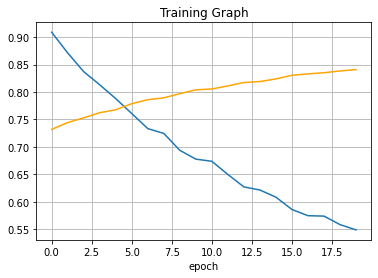

In [0]:
plt.grid(1)
plt.title("Training Graph")
plt.xlabel("epoch")
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],color="orange")

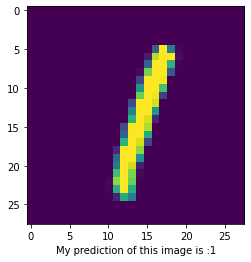

In [0]:
image_num = np.random.randint(10)

predict = np.argmax(model.predict(x_test_data[image_num].reshape(1,28,28,1)))

plt.xlabel("My prediction of this image is :"+str(predict))
plt.imshow(x_test_data[image_num].reshape(28,28))

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17994073896793020103, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8371260812203435917
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5054400014697130547
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7304675328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9991086046301431359
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

In [0]:
model.save("mnist.h5")